In [26]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 
from matplotlib.lines import Line2D

# Read the CSV file
df = pd.read_csv("songs_with_root_and_mode.csv")
df.head()

,Unnamed: 0,song_number,song_name,song_root_note,song_mode
0,0,0,after mid-term\dataset\295\albeniz\alb_esp1.mid,d,Harmonic_minor
1,1,1,after mid-term\dataset\295\albeniz\alb_esp2.mid,D,Ionian
2,2,2,after mid-term\dataset\295\albeniz\alb_esp3.mid,e,Harmonic_minor
3,3,3,after mid-term\dataset\295\albeniz\alb_esp4.mid,g,Aeolian
4,4,4,after mid-term\dataset\295\albeniz\alb_esp5.mid,E-,Ionian


In [27]:
# Combine small letter root notes with their corresponding big letter root notes
df['song_root_note'] = df['song_root_note'].str.upper()
df = df[(df['song_root_note'] != 'NANN') & (df['song_mode'] != 'NANN')]

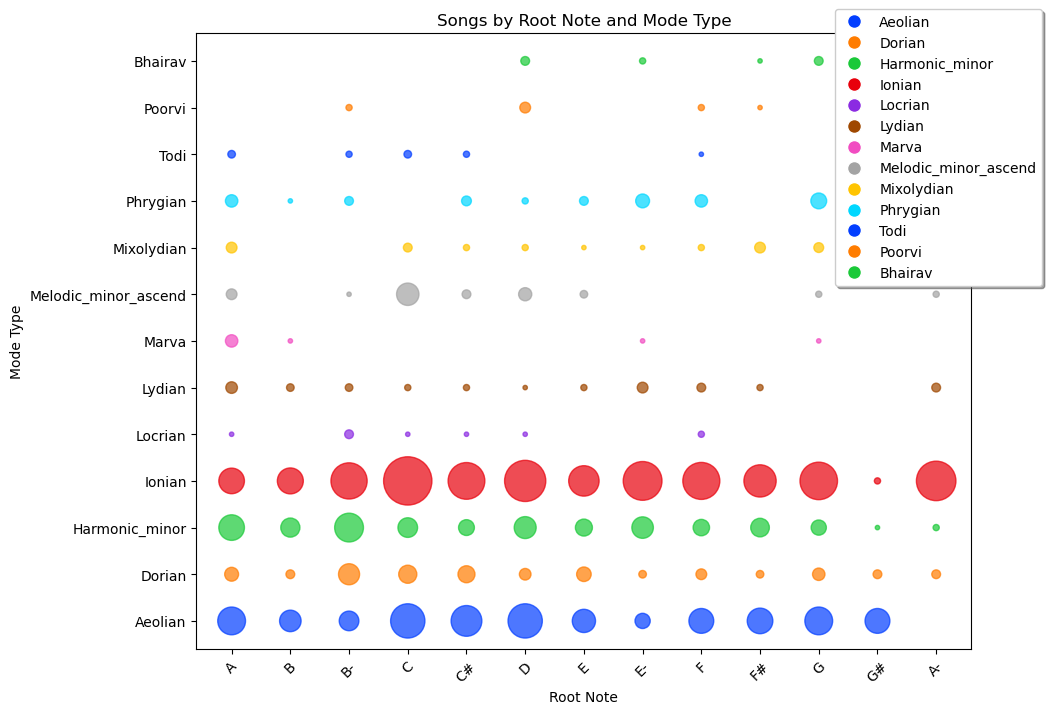

In [29]:
# Group by root note and mode, count the number of songs, and reset the index
grouped = df.groupby(['song_root_note', 'song_mode']).size().reset_index(name='count')

# Get unique mode types
modes = grouped['song_mode'].unique()

# Generate a color palette with a different color for each mode type
colors = sns.color_palette('bright', n_colors=len(modes))

# Plotting
plt.figure(figsize=(10, 8))
for i, mode in enumerate(modes):
    mode_df = grouped[grouped['song_mode'] == mode]
    sizes = mode_df['count'] * 10  # Define sizes based on the number of songs for the current mode
    plt.scatter(mode_df['song_root_note'], mode_df['song_mode'], s=sizes, color=colors[i], alpha=0.7)

# Create proxy artists for legend with same size
legend_elements = [Line2D([0], [0], marker='o', color='w', markerfacecolor=colors[i], markersize=10, label=mode) for i, mode in enumerate(modes)]

plt.xlabel('Root Note')
plt.ylabel('Mode Type')
plt.title('Songs by Root Note and Mode Type')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.legend(handles=legend_elements, loc='upper right', bbox_to_anchor=(1.1, 1.05), fancybox=True, shadow=True)
plt.grid(False)
plt.show()

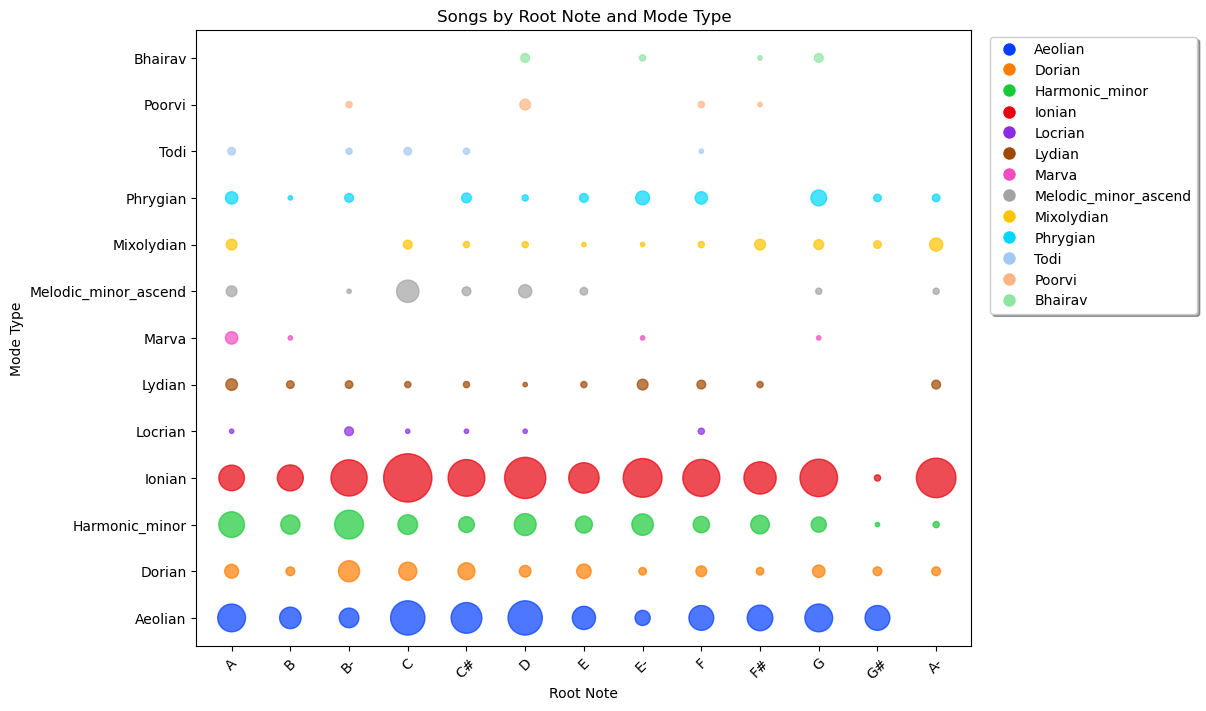

In [31]:
# Group by root note and mode, count the number of songs, and reset the index
grouped = df.groupby(['song_root_note', 'song_mode']).size().reset_index(name='count')

# Get unique mode types
modes = grouped['song_mode'].unique()

# Generate a color palette with a different color for each mode type
# For the last few modes, use lighter shades
if len(modes) > 5:
    colors = sns.color_palette('bright', n_colors=len(modes)-3)
    colors += sns.color_palette('pastel', n_colors=3)
else:
    colors = sns.color_palette('bright', n_colors=len(modes))

# Plotting
plt.figure(figsize=(10, 8))
for i, mode in enumerate(modes):
    mode_df = grouped[grouped['song_mode'] == mode]
    sizes = mode_df['count'] * 10  # Define sizes based on the number of songs for the current mode
    plt.scatter(mode_df['song_root_note'], mode_df['song_mode'], s=sizes, color=colors[i], alpha=0.7)

# Create proxy artists for legend with same size
legend_elements = [Line2D([0], [0], marker='o', color='w', markerfacecolor=colors[i], markersize=10, label=mode) for i, mode in enumerate(modes)]

plt.xlabel('Root Note')
plt.ylabel('Mode Type')
plt.title('Songs by Root Note and Mode Type')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.legend(handles=legend_elements, loc='upper right', bbox_to_anchor=(1.3, 1), fancybox=True, shadow=True)
plt.grid(False)  # Turn off the grid
plt.show()